In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
from matplotlib import cm
import plotly.express as px
import seaborn as sns

In [2]:
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [4]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

np.int64(483)

In [7]:
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df = df.drop(10472, axis=0)

In [10]:
df[df['Rating']==19]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [11]:
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

### **Data Analysis**

In [12]:
df['App'].value_counts()

App
ROBLOX              9
8 Ball Pool         7
Helix Jump          6
Bubble Shooter      6
Zombie Catchers     6
                   ..
Fr. Daoud Lamei     1
Poop FR             1
PLMGSS FR           1
List iptv FR        1
Infinite Painter    1
Name: count, Length: 9659, dtype: int64

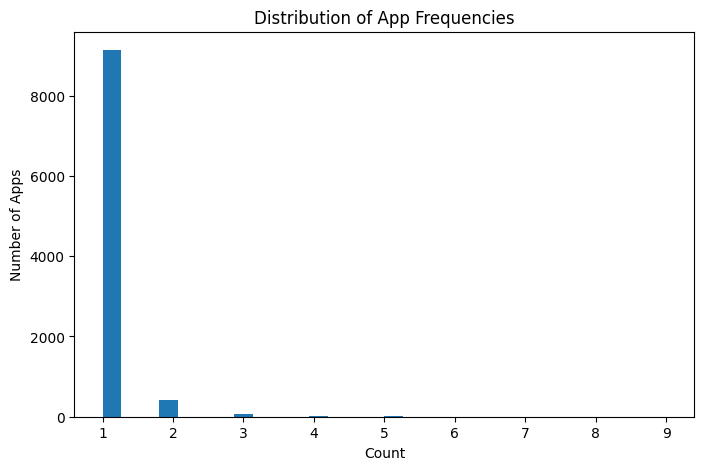

In [13]:
df['App'].value_counts().plot(kind='hist', bins=30, figsize=(8,5))
plt.title("Distribution of App Frequencies")
plt.xlabel("Count")
plt.ylabel("Number of Apps")
plt.show()

1. **Rating Column Analysis**

In [14]:
df['Rating'].isna().sum()

np.int64(1465)

In [15]:
df['Rating'].fillna(df['Rating'].mean(), inplace=True)  

C:\Users\aboel\AppData\Local\Temp\ipykernel_19560\3893186119.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(df['Rating'].mean(), inplace=True)


In [16]:
df['Rating'].isna().sum()

np.int64(0)

<Axes: xlabel='Rating'>

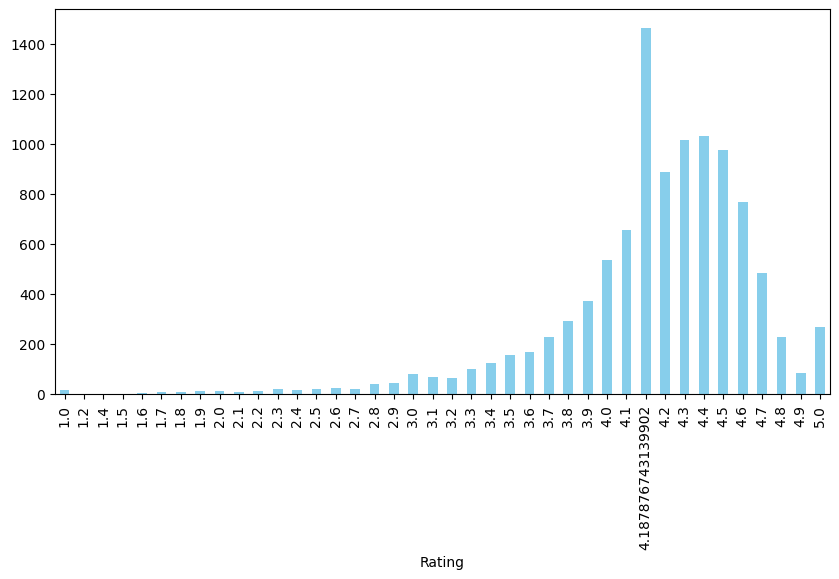

In [17]:
df['Rating'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), color='skyblue') 

<Axes: ylabel='Frequency'>

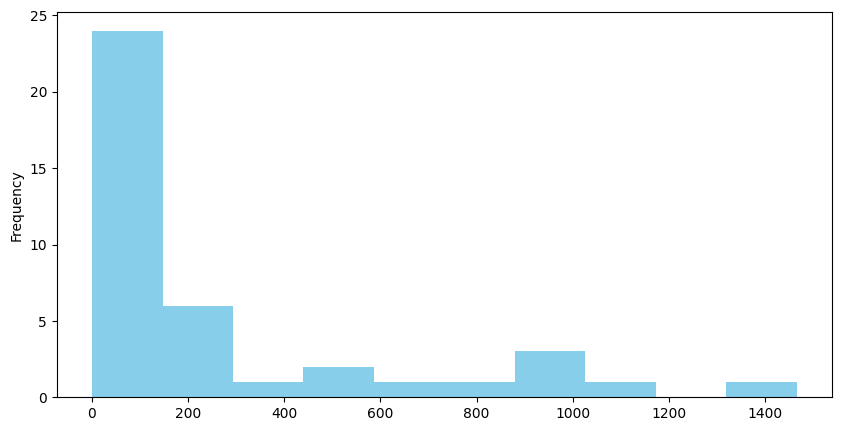

In [18]:
df['Rating'].value_counts().sort_index().plot(kind='hist', figsize=(10, 5), color='skyblue')

In [19]:
df['Rating'].mean()

np.float64(4.187876743139901)

In [20]:
df[df['Rating'] == df['Rating'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37M,"1,000+",Free,0,Everyone,Comics,"June 26, 2018",2.0,4.0.3 and up
612,American Girls Mobile Numbers,DATING,5.0,5,4.4M,"1,000+",Free,0,Mature 17+,Dating,"July 17, 2018",3.0,4.0.3 and up
615,Awake Dating,DATING,5.0,2,70M,100+,Free,0,Mature 17+,Dating,"July 24, 2018",2.2.9,4.4 and up
633,Spine- The dating app,DATING,5.0,5,9.3M,500+,Free,0,Teen,Dating,"July 14, 2018",4.0,4.0.3 and up
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.0M,100+,Free,0,Mature 17+,Dating,"August 1, 2018",8.2,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10721,Mad Dash Fo' Cash,GAME,5.0,14,16M,100+,Free,0,Everyone,Arcade,"June 19, 2017",2.5a,4.1 and up
10742,GKPB FP Online Church,LIFESTYLE,5.0,32,7.9M,"1,000+",Free,0,Everyone,Lifestyle,"December 31, 2017",0.7.1,4.4 and up
10776,Monster Ride Pro,GAME,5.0,1,24M,10+,Free,0,Everyone,Racing,"March 5, 2018",2.0,2.3 and up
10820,Fr. Daoud Lamei,FAMILY,5.0,22,8.6M,"1,000+",Free,0,Teen,Education,"June 27, 2018",3.8.0,4.1 and up


In [21]:
df[df['Rating'] == df['Rating'].min()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
625,House party - live chat,DATING,1.0,1,9.2M,10+,Free,0,Mature 17+,Dating,"July 31, 2018",3.52,4.0.3 and up
4127,Speech Therapy: F,FAMILY,1.0,1,16M,10+,Paid,$2.99,Everyone,Education,"October 7, 2016",1.0,2.3.3 and up
5151,Clarksburg AH,MEDICAL,1.0,1,28M,50+,Free,0,Everyone,Medical,"May 1, 2017",300000.0.81,4.0.3 and up
5978,Truck Driving Test Class 3 BC,FAMILY,1.0,1,2.0M,50+,Paid,$1.49,Everyone,Education,"April 9, 2012",1.0,2.1 and up
6319,BJ Bridge Standard American 2018,GAME,1.0,1,4.9M,"1,000+",Free,0,Everyone,Card,"May 21, 2018",6.2-sayc,4.0 and up
6490,MbH BM,MEDICAL,1.0,1,2.3M,100+,Free,0,Everyone,Medical,"December 14, 2016",1.1.3,4.3 and up
7144,CB Mobile Biz,FINANCE,1.0,3,8.4M,500+,Free,0,Everyone,Finance,"February 22, 2016",4.4.1255,4.0 and up
7383,Thistletown CI,PRODUCTIVITY,1.0,1,6.6M,100+,Free,0,Everyone,Productivity,"March 15, 2018",41.9,4.1 and up
7427,CJ DVD Rentals,COMMUNICATION,1.0,5,13M,100+,Free,0,Everyone,Communication,"October 6, 2017",1.0,4.1 and up
7806,CR Magazine,BUSINESS,1.0,1,7.8M,100+,Free,0,Everyone,Business,"July 23, 2014",2.4.2,2.3.3 and up


In [22]:
df['Rating'].median()

np.float64(4.2)

<Axes: >

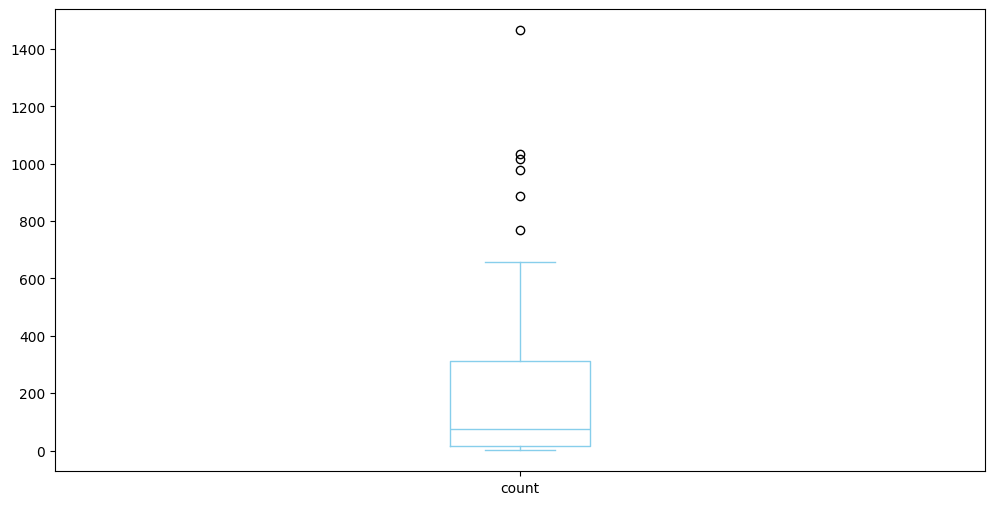

In [23]:
df['Rating'].value_counts().sort_index().plot(kind='box', figsize=(12, 6), color='skyblue')

### **3 Catogory colunm **

In [24]:
df['Category'].value_counts(normalize=True) *100   

Category
FAMILY                 18.760259
GAME                   10.823598
TOOLS                   8.139423
BUSINESS                4.122815
MEDICAL                 3.939365
PRODUCTIVITY            3.929709
PERSONALIZATION         3.746259
LIFESTYLE               3.601429
COMMUNICATION           3.533842
FINANCE                 3.475910
SPORTS                  3.389012
PHOTOGRAPHY             3.109008
HEALTH_AND_FITNESS      2.954524
SOCIAL                  2.703486
NEWS_AND_MAGAZINES      2.549001
TRAVEL_AND_LOCAL        2.288307
BOOKS_AND_REFERENCE     2.220720
SHOPPING                2.162788
DATING                  1.892440
VIDEO_PLAYERS           1.689678
MAPS_AND_NAVIGATION     1.322777
EDUCATION               1.255190
FOOD_AND_DRINK          1.197258
ENTERTAINMENT           1.071739
LIBRARIES_AND_DEMO      0.820701
AUTO_AND_VEHICLES       0.820701
WEATHER                 0.791735
HOUSE_AND_HOME          0.772424
ART_AND_DESIGN          0.627595
EVENTS                  0.617940
C

In [25]:
px.histogram(df, x='Category', title='Distribution of App Categories')

In [26]:
df['Reviews'].isna().sum()

np.int64(0)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          10357 non-null  float64
 3   Reviews         10357 non-null  object 
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  object 
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [28]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          10357 non-null  float64
 3   Reviews         10357 non-null  int64  
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  object 
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [30]:
df = df.convert_dtypes()


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  string 
 1   Category        10357 non-null  string 
 2   Rating          10357 non-null  Float64
 3   Reviews         10357 non-null  Int64  
 4   Size            10357 non-null  string 
 5   Installs        10357 non-null  string 
 6   Type            10356 non-null  string 
 7   Price           10357 non-null  string 
 8   Content Rating  10357 non-null  string 
 9   Genres          10357 non-null  string 
 10  Last Updated    10357 non-null  string 
 11  Current Ver     10349 non-null  string 
 12  Android Ver     10355 non-null  string 
dtypes: Float64(1), Int64(1), string(11)
memory usage: 1.1 MB


In [32]:


def size_to_mb(x):
    if "M" in x:
        return float(x.replace("M", ""))
    elif "k" in x or "K" in x:
        return float(x.replace("k", "").replace("K", "")) / 1024
    else:
        return np.nan  # لو مكتوب "Varies with device" أو NaN

df["Size_MB"] = df["Size"].astype(str).apply(size_to_mb)

print(df[["App", "Size", "Size_MB"]].head(15))


                                                  App  Size  Size_MB
0      Photo Editor & Candy Camera & Grid & ScrapBook   19M     19.0
1                                 Coloring book moana   14M     14.0
2   U Launcher Lite – FREE Live Cool Themes, Hide ...  8.7M      8.7
3                               Sketch - Draw & Paint   25M     25.0
4               Pixel Draw - Number Art Coloring Book  2.8M      2.8
5                          Paper flowers instructions  5.6M      5.6
6             Smoke Effect Photo Maker - Smoke Editor   19M     19.0
7                                    Infinite Painter   29M     29.0
8                                Garden Coloring Book   33M     33.0
9                       Kids Paint Free - Drawing Fun  3.1M      3.1
10                            Text on Photo - Fonteee   28M     28.0
11            Name Art Photo Editor - Focus n Filters   12M     12.0
12                     Tattoo Name On My Photo Editor   20M     20.0
13                              Ma

In [33]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


In [34]:
df.drop(columns=["Size"], inplace=True)

In [35]:
df.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  string 
 1   Category        10357 non-null  string 
 2   Rating          10357 non-null  Float64
 3   Reviews         10357 non-null  Int64  
 4   Installs        10357 non-null  string 
 5   Type            10356 non-null  string 
 6   Price           10357 non-null  string 
 7   Content Rating  10357 non-null  string 
 8   Genres          10357 non-null  string 
 9   Last Updated    10357 non-null  string 
 10  Current Ver     10349 non-null  string 
 11  Android Ver     10355 non-null  string 
 12  Size_MB         8831 non-null   float64
dtypes: Float64(1), Int64(1), float64(1), string(10)
memory usage: 1.1 MB


In [37]:
df['Size_MB'].isna().sum()

np.int64(1526)

In [38]:
df['Size_MB'].fillna(df['Size_MB'].mean(), inplace=True)

C:\Users\aboel\AppData\Local\Temp\ipykernel_19560\3274056361.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  string 
 1   Category        10357 non-null  string 
 2   Rating          10357 non-null  Float64
 3   Reviews         10357 non-null  Int64  
 4   Installs        10357 non-null  string 
 5   Type            10356 non-null  string 
 6   Price           10357 non-null  string 
 7   Content Rating  10357 non-null  string 
 8   Genres          10357 non-null  string 
 9   Last Updated    10357 non-null  string 
 10  Current Ver     10349 non-null  string 
 11  Android Ver     10355 non-null  string 
 12  Size_MB         10357 non-null  float64
dtypes: Float64(1), Int64(1), float64(1), string(10)
memory usage: 1.1 MB


In [40]:
def preprocess_installs(series):
    cleaned = (
        series.astype(str)
        .str.replace("+", "", regex=False)
        .str.replace(",", "", regex=False)
        .replace("nan", None)
    )
    return pd.to_numeric(cleaned, errors="coerce").astype("Int64")

# تطبيقها
df["Installs"] = preprocess_installs(df["Installs"])


In [41]:
df.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  string 
 1   Category        10357 non-null  string 
 2   Rating          10357 non-null  Float64
 3   Reviews         10357 non-null  Int64  
 4   Installs        10357 non-null  Int64  
 5   Type            10356 non-null  string 
 6   Price           10357 non-null  string 
 7   Content Rating  10357 non-null  string 
 8   Genres          10357 non-null  string 
 9   Last Updated    10357 non-null  string 
 10  Current Ver     10349 non-null  string 
 11  Android Ver     10355 non-null  string 
 12  Size_MB         10357 non-null  float64
dtypes: Float64(1), Int64(2), float64(1), string(9)
memory usage: 1.1 MB


In [43]:
px.histogram(df, x='Installs', nbins=30, title='Distribution of App Installs')

In [44]:
df['Type'].isna().sum()

np.int64(1)

In [45]:
df['Type'].fillna(df['Type'].mode()[0], inplace=True)

C:\Users\aboel\AppData\Local\Temp\ipykernel_19560\1142660726.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [46]:
df['Type'].value_counts()

Type
Free    9592
Paid     765
Name: count, dtype: Int64

In [47]:
px.histogram(df, x='Type', title='Distribution of App Types')

In [48]:
df['Price'].isna().sum()

np.int64(0)

In [60]:
def clean_price(price):
    """
    Clean Price column (زي ما عملنا مع Size):
    - '0' -> 0.0
    - '$X.XX' -> float
    """
    if price == '0':
        return 0.0
    elif isinstance(price, str) and price.startswith('$'):
        return float(price[1:])   # نشيل أول رمز $
    else:
        return None

# نطبّق
df['Price'] = df['Price'].apply(clean_price)


In [61]:
df.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB,Price_MB,Price_Clean
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,0.0,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,0.0,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,0.0,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,0.0,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,0.0,0.0


In [68]:
df.drop(columns=['Price'], inplace=True)

In [64]:
df['Price_Clean'].value_counts()

Price_Clean
0.00      9592
0.99       146
2.99       125
1.99        73
4.99        70
          ... 
3.61         1
394.99       1
1.26         1
1.20         1
1.04         1
Name: count, Length: 92, dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  string 
 1   Category        10357 non-null  string 
 2   Rating          10357 non-null  Float64
 3   Reviews         10357 non-null  Int64  
 4   Installs        10357 non-null  Int64  
 5   Type            10357 non-null  string 
 6   Content Rating  10357 non-null  string 
 7   Genres          10357 non-null  string 
 8   Last Updated    10357 non-null  string 
 9   Current Ver     10349 non-null  string 
 10  Android Ver     10355 non-null  string 
 11  Size_MB         10357 non-null  float64
 12  Price_MB        10357 non-null  float64
 13  Price_Clean     10357 non-null  float64
dtypes: Float64(1), Int64(2), float64(3), string(8)
memory usage: 1.2 MB


In [70]:
df['Content Rating'].value_counts()

Content Rating
Everyone           8382
Teen               1146
Mature 17+          447
Everyone 10+        377
Adults only 18+       3
Unrated               2
Name: count, dtype: Int64

In [71]:
px.histogram(df, x='Content Rating')

In [72]:
df['Genres'].value_counts()

Genres
Tools                       842
Entertainment               588
Education                   527
Business                    427
Medical                     408
                           ... 
Role Playing;Brain Games      1
Strategy;Education            1
Racing;Pretend Play           1
Communication;Creativity      1
Strategy;Creativity           1
Name: count, Length: 119, dtype: Int64

In [74]:
px.histogram(df, x='Genres', nbins=30, title='Distribution of App Genres')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10357 non-null  string        
 1   Category        10357 non-null  string        
 2   Rating          10357 non-null  Float64       
 3   Reviews         10357 non-null  Int64         
 4   Installs        10357 non-null  Int64         
 5   Type            10357 non-null  string        
 6   Content Rating  10357 non-null  string        
 7   Genres          10357 non-null  string        
 8   Last Updated    10357 non-null  datetime64[ns]
 9   Current Ver     9047 non-null   string        
 10  Android Ver     10355 non-null  string        
 11  Size_MB         10357 non-null  float64       
 12  Price_MB        10357 non-null  float64       
 13  Price_Clean     10357 non-null  float64       
dtypes: Float64(1), Int64(2), datetime64[ns](1), float64(3), str

In [76]:
# Last Updated -> datetime
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

# Current Ver -> clean
df['Current Ver'] = df['Current Ver'].replace('Varies with device', pd.NA)

# Android Ver -> extr


In [77]:
df.head()

,App,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB,Price_MB,Price_Clean
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,19.0,0.0,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,14.0,0.0,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,8.7,0.0,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,Teen,Art & Design,2018-06-08,<NA>,4.2 and up,25.0,0.0,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2.8,0.0,0.0


In [81]:
df['Current Ver'].fillna(df['Current Ver'].mode()[0], inplace=True)

In [116]:
df['Android Ver'] = df['Android Ver'].replace('Varies with device', np.nan)
df['Android Ver'].fillna(df['Android Ver'].mode()[0], inplace=True)


C:\Users\aboel\AppData\Local\Temp\ipykernel_19560\271456342.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   App                10357 non-null  string 
 1   Category           10357 non-null  string 
 2   Rating             10357 non-null  Float64
 3   Reviews            10357 non-null  Int64  
 4   Type               10357 non-null  string 
 5   Content Rating     10357 non-null  string 
 6   Genres             10357 non-null  string 
 7   Current Ver        10357 non-null  string 
 8   Android Ver        10357 non-null  string 
 9   Size_MB            10357 non-null  float64
 10  Price_MB           10357 non-null  float64
 11  Price_Clean        10357 non-null  float64
 12  Last_Updated_Year  10357 non-null  int32  
 13  Installs_log       10357 non-null  Float64
dtypes: Float64(2), Int64(1), float64(3), int32(1), string(7)
memory usage: 1.2 MB


In [83]:
px.scatter(df, x='Size_MB', y='Installs', color='Category', title='Size vs Installs by Category')

In [84]:
px.scatter(df, x='Rating', y='Installs', color='Category', title='Rating vs Installs by Category')

In [85]:
px.scatter(df, x='Rating', y='Reviews', color='Category', title='Rating vs Reviews by Category')

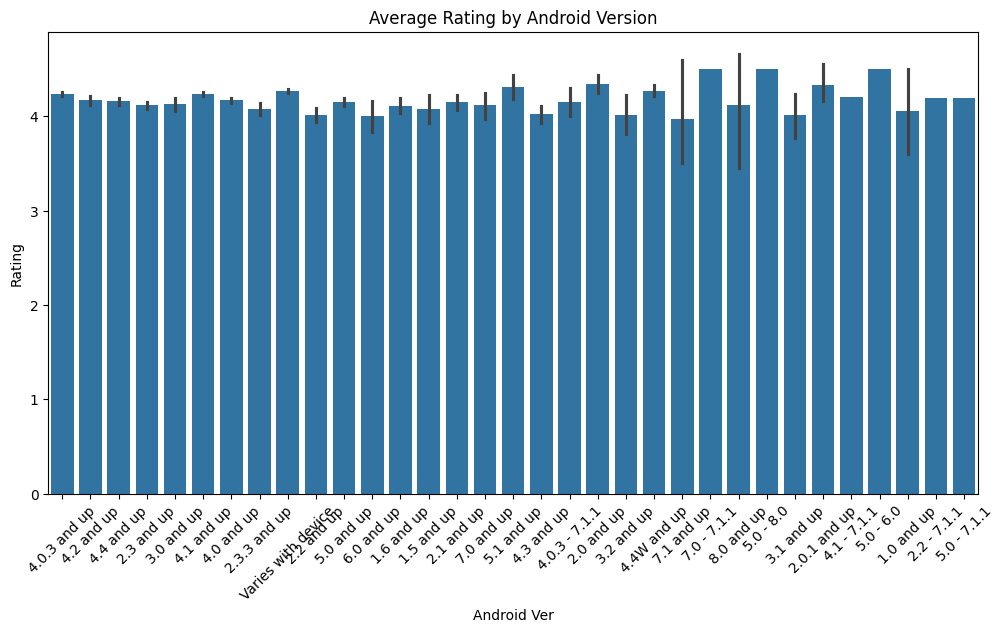

In [88]:
plt.figure(figsize=(12,6))
sns.barplot(x="Android Ver", y="Rating", data=df, estimator=lambda x: sum(x)/len(x))
plt.xticks(rotation=45)
plt.title("Average Rating by Android Version")
plt.show()


In [90]:
df['Android Ver'].mode()[0]

'4.1 and up'

In [91]:
df['Android Ver'].fillna(df['Android Ver'].mode()[0], inplace=True)

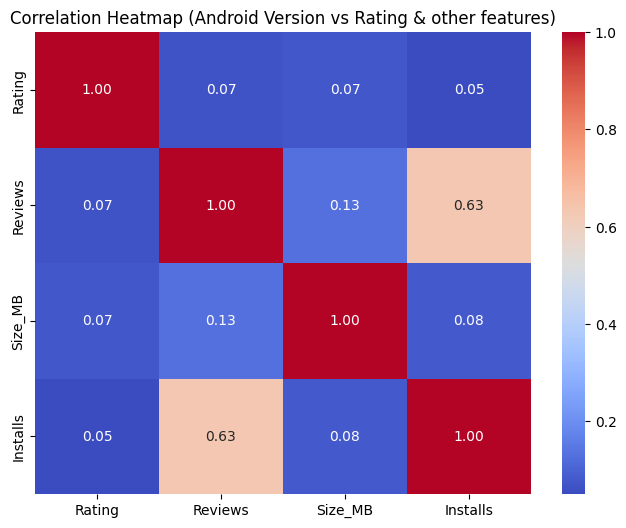

In [ ]:
numeric_df = df[['Rating','Reviews','Size_MB','Installs']]
corr = numeric_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Android Version vs Rating & other features)")
plt.show()


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10357 non-null  string        
 1   Category        10357 non-null  string        
 2   Rating          10357 non-null  Float64       
 3   Reviews         10357 non-null  Int64         
 4   Installs        10357 non-null  Int64         
 5   Type            10357 non-null  string        
 6   Content Rating  10357 non-null  string        
 7   Genres          10357 non-null  string        
 8   Last Updated    10357 non-null  datetime64[ns]
 9   Current Ver     10357 non-null  string        
 10  Android Ver     10357 non-null  string        
 11  Size_MB         10357 non-null  float64       
 12  Price_MB        10357 non-null  float64       
 13  Price_Clean     10357 non-null  float64       
dtypes: Float64(1), Int64(2), datetime64[ns](1), float64(3), str

In [ ]:
df['Last_Updated_Year'] = df['Last Updated'].dt.year

df.head()

,App,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB,Price_MB,Price_Clean,Last_Updated_Year,Days_Since_Update
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,19.0,0.0,0.0,2018,213
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,14.0,0.0,0.0,2018,205
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,8.7,0.0,0.0,2018,7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,Teen,Art & Design,2018-06-08,1.0,4.2 and up,25.0,0.0,0.0,2018,61
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2.8,0.0,0.0,2018,49


In [104]:
df.drop(columns=['Last Updated', 'Days_Since_Update'], inplace=True)

In [108]:
df['Installs_log'] = np.log1p(df['Installs'])  

In [110]:
df.drop(columns=["Installs"], inplace=True)

In [147]:
df.drop(columns=["App"], inplace=True)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Category              10357 non-null  string 
 1   Rating                10357 non-null  Float64
 2   Reviews               10357 non-null  Int64  
 3   Type                  10357 non-null  string 
 4   Content Rating        10357 non-null  string 
 5   Genres                10357 non-null  string 
 6   Current Ver           10357 non-null  string 
 7   Android Ver           10357 non-null  string 
 8   Size_MB               10357 non-null  float64
 9   Price_Clean           10357 non-null  float64
 10  Last_Updated_Year     10357 non-null  int32  
 11  Installs_log          10357 non-null  Float64
 12  Rating_Class          10357 non-null  object 
 13  Rating_Class_Encoded  10357 non-null  int64  
dtypes: Float64(2), Int64(1), float64(2), int32(1), int64(1), object(1), string(

In [149]:
df.head()

,Category,Rating,Reviews,Type,Content Rating,Genres,Current Ver,Android Ver,Size_MB,Price_Clean,Last_Updated_Year,Installs_log,Rating_Class,Rating_Class_Encoded
0,ART_AND_DESIGN,4.1,159,Free,Everyone,Art & Design,1.0.0,4.0.3 and up,19.0,0.0,2018,9.21044,Good,2
1,ART_AND_DESIGN,3.9,967,Free,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,14.0,0.0,2018,13.122365,Average,0
2,ART_AND_DESIGN,4.7,87510,Free,Everyone,Art & Design,1.2.4,4.0.3 and up,8.7,0.0,2018,15.424949,Excellent,1
3,ART_AND_DESIGN,4.5,215644,Free,Teen,Art & Design,1.0,4.2 and up,25.0,0.0,2018,17.727534,Excellent,1
4,ART_AND_DESIGN,4.3,967,Free,Everyone,Art & Design;Creativity,1.1,4.4 and up,2.8,0.0,2018,11.512935,Good,2


### **Data Preprocessing**


In [150]:

def encode_rating(value):
    if value >= 4.5:
        return "Excellent"   
    elif value >= 4.0:
        return "Good"    
    elif value >= 3.0:
        return "Average" 
    else:
        return "Poor"    

df['Rating_Class'] = df['Rating'].apply(encode_rating)


from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Rating_Class_Encoded'] = encoder.fit_transform(df['Rating_Class'])

print(df[['Rating', 'Rating_Class', 'Rating_Class_Encoded']].head(10))


   Rating Rating_Class  Rating_Class_Encoded
0     4.1         Good                     2
1     3.9      Average                     0
2     4.7    Excellent                     1
3     4.5    Excellent                     1
4     4.3         Good                     2
5     4.4         Good                     2
6     3.8      Average                     0
7     4.1         Good                     2
8     4.4         Good                     2
9     4.7    Excellent                     1


In [151]:
df.head()

,Category,Rating,Reviews,Type,Content Rating,Genres,Current Ver,Android Ver,Size_MB,Price_Clean,Last_Updated_Year,Installs_log,Rating_Class,Rating_Class_Encoded
0,ART_AND_DESIGN,4.1,159,Free,Everyone,Art & Design,1.0.0,4.0.3 and up,19.0,0.0,2018,9.21044,Good,2
1,ART_AND_DESIGN,3.9,967,Free,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,14.0,0.0,2018,13.122365,Average,0
2,ART_AND_DESIGN,4.7,87510,Free,Everyone,Art & Design,1.2.4,4.0.3 and up,8.7,0.0,2018,15.424949,Excellent,1
3,ART_AND_DESIGN,4.5,215644,Free,Teen,Art & Design,1.0,4.2 and up,25.0,0.0,2018,17.727534,Excellent,1
4,ART_AND_DESIGN,4.3,967,Free,Everyone,Art & Design;Creativity,1.1,4.4 and up,2.8,0.0,2018,11.512935,Good,2


In [152]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=["Rating", "Rating_Class", "Rating_Class_Encoded"])
y = df["Rating_Class_Encoded"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [153]:
X_train

,Category,Reviews,Type,Content Rating,Genres,Current Ver,Android Ver,Size_MB,Price_Clean,Last_Updated_Year,Installs_log
2173,FAMILY,38,Paid,Everyone,Casual;Pretend Play,1.2,2.3.3 and up,47.000000,0.99,2014,6.908755
10662,BOOKS_AND_REFERENCE,1,Paid,Everyone,Books & Reference,Android 3.0 - 2015,1.6 and up,7.300000,6.49,2015,2.397895
2330,MEDICAL,87418,Free,Everyone,Medical,2.25.0,4.4 and up,14.000000,0.00,2018,13.815512
1948,GAME,10538,Free,Mature 17+,Action,1.0.8,2.3 and up,50.000000,0.00,2018,13.815512
1201,FOOD_AND_DRINK,151080,Free,Everyone,Food & Drink,1.0,4.1 and up,21.287413,0.00,2018,15.424949
...,...,...,...,...,...,...,...,...,...,...,...
6193,PHOTOGRAPHY,7118,Free,Everyone,Photography,1.6,4.0 and up,9.200000,0.00,2018,13.815512
5648,GAME,27856,Paid,Teen,Action,1.07,2.3 and up,50.000000,2.99,2015,11.512935
5847,LIFESTYLE,484,Paid,Mature 17+,Lifestyle,1.0,4.1 and up,21.287413,4.99,2018,6.908755
1008,EVENTS,26089,Free,Everyone,Events,4.2.1,4.1 and up,21.287413,0.00,2018,15.424949


In [154]:
from sklearn.preprocessing import RobustScaler

In [155]:
Numerical_data = ['Reviews', 'Size_MB', 'Installs_log', 'Price_Clean', 'Last_Updated_Year']

In [156]:
scaler = RobustScaler() 
scaler.fit(X_train[Numerical_data])
X_train[Numerical_data] = scaler.transform(X_train[Numerical_data])
X_test[Numerical_data] = scaler.transform(X_test[Numerical_data])

In [157]:
X_train

,Category,Reviews,Type,Content Rating,Genres,Current Ver,Android Ver,Size_MB,Price_Clean,Last_Updated_Year,Installs_log
2173,FAMILY,-0.035123,Paid,Everyone,Casual;Pretend Play,1.2,2.3.3 and up,1.477833,0.99,-4.0,-0.666620
10662,BOOKS_AND_REFERENCE,-0.035924,Paid,Everyone,Books & Reference,Android 3.0 - 2015,1.6 and up,-0.477833,6.49,-3.0,-1.319728
2330,MEDICAL,1.855851,Free,Everyone,Medical,2.25.0,4.4 and up,-0.147783,0.00,0.0,0.333380
1948,GAME,0.192105,Free,Mature 17+,Action,1.0.8,2.3 and up,1.625616,0.00,0.0,0.333380
1201,FOOD_AND_DRINK,3.233548,Free,Everyone,Food & Drink,1.0,4.1 and up,0.211203,0.00,0.0,0.566404
...,...,...,...,...,...,...,...,...,...,...,...
6193,PHOTOGRAPHY,0.118094,Free,Everyone,Photography,1.6,4.0 and up,-0.384236,0.00,0.0,0.333380
5648,GAME,0.566881,Paid,Teen,Action,1.07,2.3 and up,1.625616,2.99,-3.0,0.000000
5847,LIFESTYLE,-0.025471,Paid,Mature 17+,Lifestyle,1.0,4.1 and up,0.211203,4.99,0.0,-0.666620
1008,EVENTS,0.528642,Free,Everyone,Events,4.2.1,4.1 and up,0.211203,0.00,0.0,0.566404


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Category              10357 non-null  string 
 1   Rating                10357 non-null  Float64
 2   Reviews               10357 non-null  Int64  
 3   Type                  10357 non-null  string 
 4   Content Rating        10357 non-null  string 
 5   Genres                10357 non-null  string 
 6   Current Ver           10357 non-null  string 
 7   Android Ver           10357 non-null  string 
 8   Size_MB               10357 non-null  float64
 9   Price_Clean           10357 non-null  float64
 10  Last_Updated_Year     10357 non-null  int32  
 11  Installs_log          10357 non-null  Float64
 12  Rating_Class          10357 non-null  object 
 13  Rating_Class_Encoded  10357 non-null  int64  
dtypes: Float64(2), Int64(1), float64(2), int32(1), int64(1), object(1), string(

In [159]:
from sklearn.preprocessing import LabelEncoder
cat_data = ['Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']
df_encoded = df.copy()
lb = LabelEncoder()
for col in cat_data:
    df_encoded[col] = lb.fit_transform(df_encoded[col].astype(str))

df_encoded.head()


,Category,Rating,Reviews,Type,Content Rating,Genres,Current Ver,Android Ver,Size_MB,Price_Clean,Last_Updated_Year,Installs_log,Rating_Class,Rating_Class_Encoded
0,0,4.1,159,0,1,9,118,15,19.0,0.0,2018,9.21044,Good,2
1,0,3.9,967,0,1,12,1018,15,14.0,0.0,2018,13.122365,Average,0
2,0,4.7,87510,0,1,9,464,15,8.7,0.0,2018,15.424949,Excellent,1
3,0,4.5,215644,0,4,9,113,18,25.0,0.0,2018,17.727534,Excellent,1
4,0,4.3,967,0,1,11,277,20,2.8,0.0,2018,11.512935,Good,2
